In [ ]:
url = 'https://raw.githubusercontent.com/tdoan89/ml-dataset/main/titanic_preprocessed_01.csv'

In [ ]:
# Survived or Not-survived
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
titanic_raw = sns.load_dataset('titanic')
titanic_raw.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic = pd.read_csv(url)
titanic.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,embark_town,alive,alone,fare_zscore,sex_female,sex_male,"age_cat_(-inf, 12.0]","age_cat_(12.0, 18.0]","age_cat_(18.0, 25.0]","age_cat_(25.0, 30.0]","age_cat_(30.0, 35.0]","age_cat_(35.0, 40.0]","age_cat_(40.0, 45.0]","age_cat_(45.0, 50.0]","age_cat_(50.0, 60.0]","age_cat_(60.0, 70.0]","age_cat_(70.0, 80.0]","age_cat_(80.0, inf]",embarked_C,embarked_None,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Missing
0,0,3,22.0,1,0,7.2500,1,Southampton,no,0,-0.910206,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,Cherbourg,yes,0,1.368848,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,Southampton,yes,1,-0.821443,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,Southampton,yes,0,1.075214,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,1,Southampton,no,1,-0.805838,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   survived              891 non-null    int64  
 1   pclass                891 non-null    int64  
 2   age                   889 non-null    float64
 3   sibsp                 891 non-null    int64  
 4   parch                 891 non-null    int64  
 5   fare                  891 non-null    float64
 6   adult_male            891 non-null    int64  
 7   embark_town           889 non-null    object 
 8   alive                 891 non-null    object 
 9   alone                 891 non-null    int64  
 10  fare_zscore           891 non-null    float64
 11  sex_female            891 non-null    int64  
 12  sex_male              891 non-null    int64  
 13  age_cat_(-inf, 12.0]  891 non-null    int64  
 14  age_cat_(12.0, 18.0]  891 non-null    int64  
 15  age_cat_(18.0, 25.0]  8

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_data = titanic.drop(columns=['embark_town', 'alive'])
model_data.dropna(inplace=True)
model_data

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,fare_zscore,sex_female,sex_male,"age_cat_(-inf, 12.0]","age_cat_(12.0, 18.0]","age_cat_(18.0, 25.0]","age_cat_(25.0, 30.0]","age_cat_(30.0, 35.0]","age_cat_(35.0, 40.0]","age_cat_(40.0, 45.0]","age_cat_(45.0, 50.0]","age_cat_(50.0, 60.0]","age_cat_(60.0, 70.0]","age_cat_(70.0, 80.0]","age_cat_(80.0, inf]",embarked_C,embarked_None,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Missing
0,0,3,22.000000,1,0,7.2500,1,0,-0.910206,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
1,1,1,38.000000,1,0,71.2833,0,0,1.368848,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1,3,26.000000,0,0,7.9250,0,1,-0.821443,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1.075214,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0
4,0,3,35.000000,0,0,8.0500,1,1,-0.805838,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,1,-0.327946,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
887,1,1,19.000000,0,0,30.0000,0,1,0.505885,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0
888,0,3,31.716561,1,2,23.4500,0,0,0.260270,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
889,1,1,26.000000,0,0,30.0000,1,1,0.505885,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
X_data = model_data.drop(columns='survived')
Y_data = model_data['survived']
display(X_data, Y_data)

,pclass,age,sibsp,parch,fare,adult_male,alone,fare_zscore,sex_female,sex_male,"age_cat_(-inf, 12.0]","age_cat_(12.0, 18.0]","age_cat_(18.0, 25.0]","age_cat_(25.0, 30.0]","age_cat_(30.0, 35.0]","age_cat_(35.0, 40.0]","age_cat_(40.0, 45.0]","age_cat_(45.0, 50.0]","age_cat_(50.0, 60.0]","age_cat_(60.0, 70.0]","age_cat_(70.0, 80.0]","age_cat_(80.0, inf]",embarked_C,embarked_None,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Missing
0,3,22.000000,1,0,7.2500,1,0,-0.910206,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,1,0,71.2833,0,0,1.368848,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
2,3,26.000000,0,0,7.9250,0,1,-0.821443,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1.075214,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0
4,3,35.000000,0,0,8.0500,1,1,-0.805838,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,1,-0.327946,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
887,1,19.000000,0,0,30.0000,0,1,0.505885,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0
888,3,31.716561,1,2,23.4500,0,0,0.260270,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
889,1,26.000000,0,0,30.0000,1,1,0.505885,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 889, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, stratify=Y_data, random_state=420)

In [ ]:
x_train

,pclass,age,sibsp,parch,fare,adult_male,alone,fare_zscore,sex_female,sex_male,"age_cat_(-inf, 12.0]","age_cat_(12.0, 18.0]","age_cat_(18.0, 25.0]","age_cat_(25.0, 30.0]","age_cat_(30.0, 35.0]","age_cat_(35.0, 40.0]","age_cat_(40.0, 45.0]","age_cat_(45.0, 50.0]","age_cat_(50.0, 60.0]","age_cat_(60.0, 70.0]","age_cat_(70.0, 80.0]","age_cat_(80.0, inf]",embarked_C,embarked_None,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Missing
814,3,30.500000,0,0,8.0500,1,1,-0.805838,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
722,2,34.000000,0,0,13.0000,1,1,-0.327946,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
248,1,37.000000,1,1,52.5542,1,0,1.064912,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0
683,3,14.000000,5,2,46.9000,0,0,0.951413,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1
657,3,32.000000,1,1,15.5000,0,0,-0.152564,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,3,40.500000,0,2,14.5000,1,0,-0.219063,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
155,1,51.000000,0,1,61.3792,1,0,1.219689,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
129,3,45.000000,0,0,6.9750,1,1,-0.948764,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
713,3,29.000000,0,0,9.4833,1,1,-0.642451,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
x_test

,pclass,age,sibsp,parch,fare,adult_male,alone,fare_zscore,sex_female,sex_male,"age_cat_(-inf, 12.0]","age_cat_(12.0, 18.0]","age_cat_(18.0, 25.0]","age_cat_(25.0, 30.0]","age_cat_(30.0, 35.0]","age_cat_(35.0, 40.0]","age_cat_(40.0, 45.0]","age_cat_(45.0, 50.0]","age_cat_(50.0, 60.0]","age_cat_(60.0, 70.0]","age_cat_(70.0, 80.0]","age_cat_(80.0, inf]",embarked_C,embarked_None,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Missing
366,1,60.000000,1,0,75.2500,0,0,1.422845,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
377,1,27.000000,0,2,211.5000,1,0,2.453267,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
803,3,0.420000,0,1,8.5167,0,0,-0.749644,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
491,3,21.000000,0,0,7.2500,1,1,-0.910206,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
116,3,70.500000,0,0,7.7500,1,1,-0.843708,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,1,24.000000,0,0,69.3000,0,1,1.340712,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
547,2,34.960938,0,0,13.8625,1,1,-0.263894,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
704,3,26.000000,1,0,7.8542,1,0,-0.830391,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
873,3,47.000000,0,0,9.0000,1,1,-0.694608,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
clr = DecisionTreeClassifier() # Định nghĩa một mô hình
clr.fit(x_train, y_train) # Huấn luyện mô hình

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = clr.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0])

In [ ]:
accuracy_score(y_test, y_pred)*100

79.21348314606742

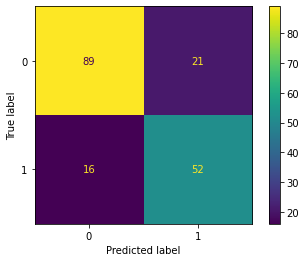

In [ ]:
plot_confusion_matrix(clr, x_test, y_test)

In [ ]:
precision_score(y_test, y_pred)*100

71.23287671232876

In [ ]:
1 - 21/(21 + 52)

0.7123287671232876

In [ ]:
recall_score(y_test, y_pred)

76.47058823529412

In [ ]:
# Data Wrangling # Wrangler # CSV # JSON # Web